In [1]:
# import libraries

import sys

# visualisation
import matplotlib.pyplot as plt

# data management and analysis
import numpy as np
import pandas as pd

# user-defined utility functions
# adding code directory to the system path
sys.path.insert(0, '/Users/joel/Data Science/NHL/code')
from utils import scatterPlot

In [2]:
# modify pyplot defaults

# LOAD DATA

In [3]:
# trimmed and normalised statistics from main sheet of NHL13-14.xls file (Hockey Abstract)

path = '../data/'
filename = 'nhlPlayerStats_13-14_main_utf8_nonempty_minGP.csv'
df_playerStats = pd.read_csv(path + filename)
df_playerStats

,Unnamed: 0,#,DOB,Birth City,S/P,Ctry,HT,Wt,S,Draft,...,GVT/G,GVT/60,Full,LTIR,SOIR,Ginj,Injury,Cap Cost,Bonuses,GVS
0,1,8.0,Feb 25 '87,Muskegon,MI,USA,73.0,219.0,L,2005.0,...,0.06,0.24,NaN,NaN,NaN,12.0,"Head, Groin",1800000.0,NaN,1.0
1,2,41.0,Jul 16 '87,Edina,MN,USA,73.0,199.0,L,NaN,...,0.05,0.39,NaN,NaN,NaN,NaN,NaN,680000.0,NaN,0.4
2,3,72.0,Jun 18 '90,St. John's,NL,CAN,74.0,206.0,L,2008.0,...,-0.05,-0.23,NaN,NaN,NaN,NaN,NaN,735000.0,NaN,-1.9
3,4,27.0,Apr 26 '77,Seria,NaN,BRN,72.0,200.0,R,1996.0,...,0.01,0.06,NaN,NaN,NaN,NaN,NaN,700000.0,NaN,-0.2
4,8,41.0,Jun 30 '81,Minneapolis,MN,USA,77.0,218.0,L,2001.0,...,0.00,0.00,NaN,NaN,NaN,41.0,Concussion,600000.0,NaN,-1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,881,2.0,Feb 03 '77,Most,NaN,CZE,71.0,190.0,R,2001.0,...,0.14,0.39,NaN,NaN,NaN,1.0,Upper body,4000000.0,NaN,4.3
746,882,39.0,Sep 01 '87,Toronto,ON,CAN,71.0,185.0,L,NaN,...,0.04,0.23,NaN,NaN,NaN,NaN,NaN,550000.0,NaN,-0.5
747,883,8.0,Jun 16 '78,Elektrenai,NaN,LTU,77.0,225.0,L,1996.0,...,0.06,0.20,NaN,NaN,NaN,NaN,NaN,3100000.0,NaN,-0.7
748,884,36.0,Sep 01 '87,Oslo,NaN,NOR,67.0,179.0,L,NaN,...,0.19,0.65,NaN,NaN,NaN,4.0,Hand,1150000.0,NaN,12.3


# EXPLORE VISUALISATIONS OF SHOT DATA

Text(0, 0.5, 'Total Shots')

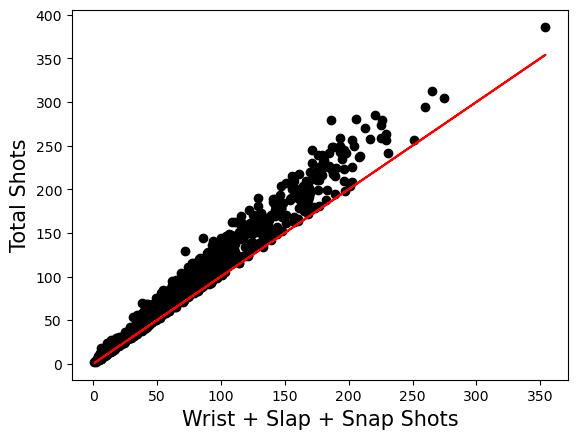

In [4]:
# reproduce plot from dataExploration notebook showing total shots versus sum of wrist, slap, and snap shots
x = df_playerStats['Wrist'] \
    + df_playerStats['Slap'] \
    + df_playerStats['Snap']
y = df_playerStats['Sh'].values
x = x.values

fig, ax = scatterPlot(x, y)
ax.plot(x, x, c='r')
ax.set_xlabel('Wrist + Slap + Snap Shots', fontsize=15)
ax.set_ylabel('Total Shots', fontsize=15)

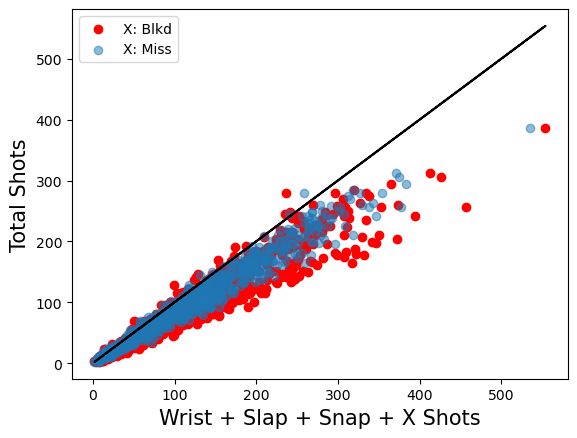

In [5]:
# check if difference between total shots and sum of wrist, slap, and snap shots due to misses or blocks
y = df_playerStats['Sh'].values

x1 = df_playerStats['Wrist'] \
    + df_playerStats['Slap'] \
    + df_playerStats['Snap'] \
    + df_playerStats['Blkd']

x2 = x1 \
    - df_playerStats['Blkd'] \
    + df_playerStats['Miss']

x1 = x1.values
x2 = x2.values

fig, ax = scatterPlot(x1, y, c='r', label='X: Blkd')
ax.scatter(x2, y, alpha=0.5, label='X: Miss')
ax.plot(x1, x1, c='k')
ax.set_xlabel('Wrist + Slap + Snap + X Shots', fontsize=15)
ax.set_ylabel('Total Shots', fontsize=15)
ax.legend()

**$\bullet$ Blocked or missed shots does not explain the difference between total shots and sum of wrist, snap, and slap shots**

Text(0, 0.5, 'Missed Shots - v2')

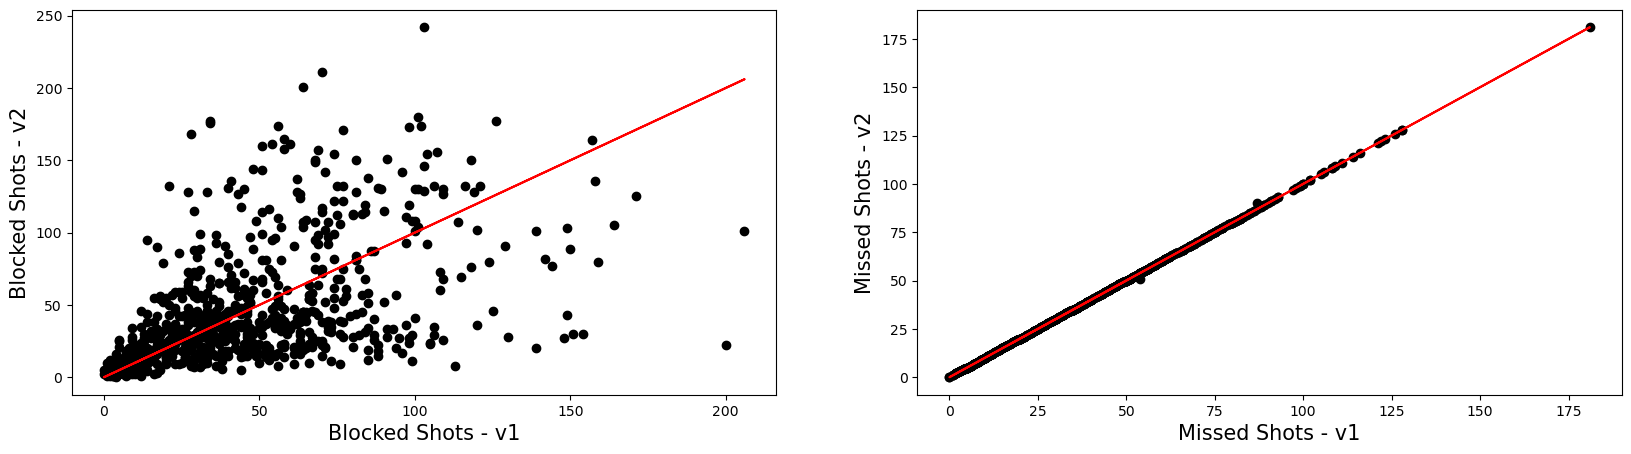

In [6]:
# Hockey Abstract appears to have two measures of blocked and missed shots; check if they are identical

fig, ax = plt.subplots(1, 2, 
                       figsize=[20, 5]
                      )
#-----

# blocked shots
ax[0].scatter(df_playerStats['Blkd'], df_playerStats['BkS'], 
              c='k', 
              #alpha=0.5
             )
ax[0].plot(df_playerStats['Blkd'], df_playerStats['Blkd'], 
           c='r'
          )
ax[0].set_xlabel('Blocked Shots (v1)', fontsize=15)
ax[0].set_ylabel('Blocked Shots (v2)', fontsize=15)

#-----

# missed shots
ax[1].scatter(df_playerStats['Miss'], df_playerStats['MsS'], 
              c='k', 
              #alpha=0.5
             )
ax[1].plot(df_playerStats['Miss'], df_playerStats['Miss'], 
           c='r'
          )
ax[1].set_xlabel('Missed Shots (v1)', fontsize=15)
ax[1].set_ylabel('Missed Shots (v2)', fontsize=15)

**$\bullet$ Huge scatter between two measures of blocked shots; two measures of missed shots agree 100%**

Fraction of sample with total shots within 50 of sum of wrist, slap, snap, and blocked shots: 0.76


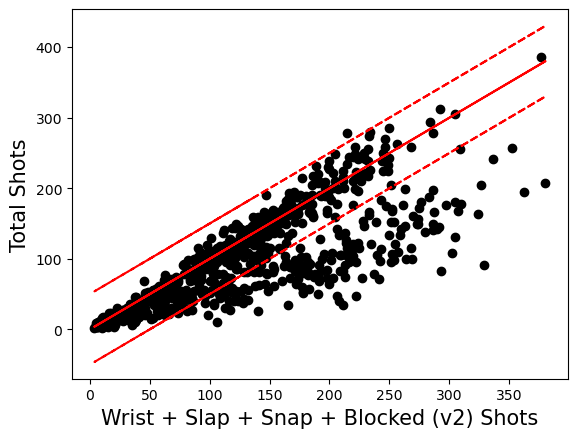

In [14]:
# check if other measure of blocked shots resolves difference between total shots and sum of wrist, slap, and snap shots
y = df_playerStats['Sh'].values

x = df_playerStats['Wrist'] \
    + df_playerStats['Slap'] \
    + df_playerStats['Snap'] \
    + df_playerStats['BkS']
x = x.values

fig, ax = scatterPlot(x, y, c='k')
ax.plot(x, x, c='r')
# add notional error envelope
ax.plot(x, x - 50., '--', c='r')
ax.plot(x, x + 50., '--', c='r')
ax.set_xlabel('Wrist + Slap + Snap + Blocked (v2) Shots', fontsize=15)
ax.set_ylabel('Total Shots', fontsize=15)

#-----

equalityFrac = (y > x - 50.) & (y < x + 50.)
print('Fraction of sample with total shots within 50 of sum of wrist, slap, snap, and blocked shots:', 
      np.round(np.sum(equalityFrac) / df_playerStats.shape[0], 2))


**$\bullet$ Second measure of blocked shots appears to resolve discrepancy for majority of sample**

## Need to treat shot data with caution; something is off in it

**$\bullet$ e.g., perhaps some shots have not been classified as either wrist, snap, or slap?**

Text(0, 0.5, 'Missed + Blocked Shots')

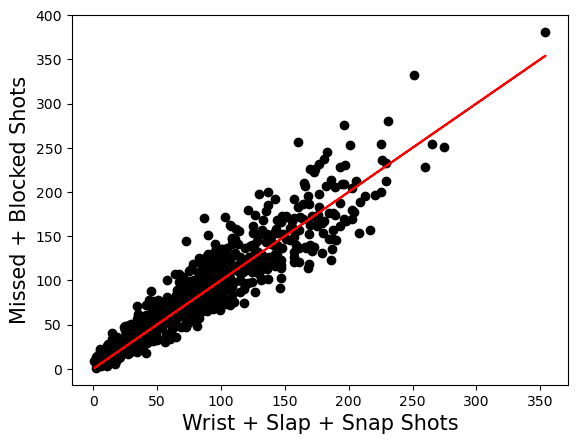

In [16]:
# plot sum of miss and blocked shots versus sume of wrist + slap + snap shots
# (stumbled across something odd here, which speaks to inference above)
x = df_playerStats['Wrist'] \
    + df_playerStats['Slap'] \
    + df_playerStats['Snap']
y = df_playerStats['Miss'] \
    + df_playerStats['Blkd']
x = x.values
y = y.values

fig, ax = scatterPlot(x, y)
ax.plot(x, x, c='r')
ax.set_xlabel('Wrist + Slap + Snap Shots', fontsize=15)
ax.set_ylabel('Missed + Blocked Shots', fontsize=15)

**$\bullet$ The two shot sums correlate with other.  How is this possible?  It would seem to imply nearly all shots do not reach the net.**

## ideas for further analysis: try reproducing shooting percentage metric using total shots